## Read/ write/ display image

In [2]:
cd Desktop/

C:\Users\aghon\Desktop


In [4]:
# import the cv2 library
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

%matplotlib inline

# The function cv2.imread() is used to read an image.

img_grayscale = cv2.imread('test.jpg',0)

# The function cv2.imshow() is used to display an image in a window.

# cv2.imshow('graycsale image',img_grayscale)
cv2_imshow(img_grayscale)

ModuleNotFoundError: No module named 'google.colab'

In [9]:
cv2.imwrite('grayscale.jpg',img_grayscale)

True

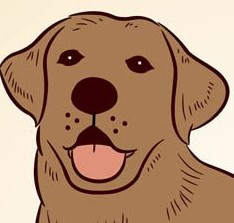

In [14]:
# Read an image
img_color = cv2.imread('test.jpg',cv2.IMREAD_COLOR)
cv2_imshow(img_color)


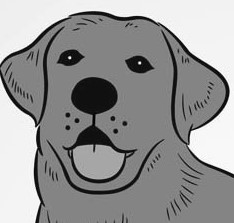

In [15]:
img_grayscale = cv2.imread('test.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(img_grayscale)


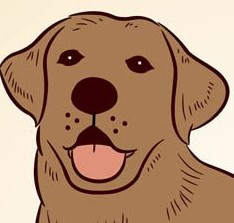

In [16]:
img_unchanged = cv2.imread('test.jpg',cv2.IMREAD_UNCHANGED)
cv2_imshow(img_unchanged)

In [17]:
img_color = cv2.imread('test.jpg',1)
img_grayscale = cv2.imread('test.jpg',0)
img_unchanged = cv2.imread('test.jpg',-1)


## Read/ write/ display video

In [5]:
import cv2
# Create a video capture object, in this case we are reading the video from a file
vid_capture = cv2.VideoCapture('bandicam.mp4')


if (vid_capture.isOpened() == False):
  print("Error opening the video file")
# Read fps and frame count
else:
  # Get frame rate information
  # You can replace 5 with CAP_PROP_FPS as well, they are enumerations
  fps = vid_capture.get(5)
  print('Frames per second : ', fps,'FPS')
 
  # Get frame count
  # You can replace 7 with CAP_PROP_FRAME_COUNT as well, they are enumerations
  frame_count = vid_capture.get(7)
  print('Frame count : ', frame_count)
 
while(vid_capture.isOpened()):
  # vid_capture.read() methods returns a tuple, first element is a bool
  # and the second is frame
  ret, frame = vid_capture.read()
  if ret == True:
    cv2.imshow('Frame',frame)
    # 20 is in milliseconds, try to increase the value, say 50 and observe
    key = cv2.waitKey(20)
     
    if key == ord('q'):
      break
  else:
    break
 
# Release the video capture object
vid_capture.release()
cv2.destroyAllWindows()


Frames per second :  29.752376033240587 FPS
Frame count :  1682.0


In [8]:
import cv2
# Create a video capture object, in this case we are reading the video from a file
vid_capture = cv2.VideoCapture('bandicam.mp4')

# width
vid_capture.get(3)

# height
vid_capture.get(4)

# fps
vid_capture.get(5)

# frame count
vid_capture.get(7)

800.0

**cv2.VideoWriter – Saves the output video to a directory.**


**The following code creates the video writer object, output from the VideoWriter() class. A special convenience function is used to retrieve the four-character codec, required as the second argument to the video writer object, cv2.**


The video codec specifies how the video stream is compressed. It converts uncompressed video to a compressed format or vice versa. To create AVI or MP4 formats, use the following fourcc specifications:

AVI: cv2.VideoWriter_fourcc('M','J','P','G')

MP4: cv2.VideoWriter_fourcc(*'XVID')



In [22]:
import cv2
# Create a video capture object, in this case we are reading the video from a file
vid_capture = cv2.VideoCapture('bandicam.mp4')

# Obtain frame size information using get() method
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))
frame_size = (frame_width,frame_height)
fps = 20

output = cv2.VideoWriter('output_video_from_file.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, frame_size)


In [23]:

while(vid_capture.isOpened()):
    # vid_capture.read() methods returns a tuple, first element is a bool
    # and the second is frame
 
    ret, frame = vid_capture.read()
    if ret == True:
           # Write the frame to the output files
           output.write(frame)
    else:
         print("Stream disconnected")
         break


Stream disconnected


## Resize image

In [3]:
# let's start with the Imports
import cv2
import numpy as np
%matplotlib inline



image=cv2.imread('test.jpg')
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
# let's downscale the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)
# specify the interpolation method, which happens to be the default value.
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
 
# let's upscale the image using new  width and height
up_width = 600
up_height = 400
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)
 
# Display images
cv2.imshow('Resized Down by defining height and width', resized_down)
cv2.waitKey()
cv2.imshow('Resized Up image by defining height and width', resized_up)
cv2.waitKey()
 
#press any key to close the windows
cv2.destroyAllWindows()

### Resizing With a Scaling Factor


In [5]:
# Scaling Up the image 1.2 times by specifying both scaling factors
scale_up_x = 1.2
scale_up_y = 1.2
# Scaling Down the image 0.6 times specifying a single scale factor.
scale_down = 0.6
scaled_f_down = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)

In [10]:
# Display images and press any key to check next image
cv2.imshow('Resized Down by defining scaling factor', scaled_f_down)
cv2.waitKey()
cv2.imshow('Resized Up image by defining scaling factor', scaled_f_up)
cv2.waitKey()


48

### Resizing With Different Interpolation Methods

* INTER_AREA: INTER_AREA uses pixel area relation for resampling. This is best suited for reducing the size of an image (shrinking). When used for zooming into the image, it uses the INTER_NEAREST method.
* INTER_CUBIC: This uses bicubic interpolation for resizing the image. While resizing and interpolating new pixels, this method acts on the 4×4 neighboring pixels of the image. It then takes the weights average of the 16 pixels to create the new interpolated pixel.
* INTER_LINEAR: This method is somewhat similar to the INTER_CUBIC interpolation. But unlike INTER_CUBIC, this uses 2×2 neighboring pixels to get the weighted average for the interpolated pixel.
* INTER_NEAREST: The INTER_NEAREST method uses the nearest neighbor concept for interpolation. This is one of the simplest methods, using only one neighboring pixel from the image for interpolation.


In [6]:
# Scaling Down the image 0.6 times using different Interpolation Method
res_inter_nearest = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)
res_inter_linear = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
res_inter_area = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)


In [7]:
# Concatenate images in horizontal axis for comparison
vertical= np.concatenate((res_inter_nearest, res_inter_linear, res_inter_area), axis = 0)
# Display the image Press any key to continue
cv2.imshow('Inter Nearest :: Inter Linear :: Inter Area', vertical)
cv2.waitKey()


48

## Cropping an Image using OpenCV


In [5]:
# Import packages
import cv2
import numpy as np
 
img = cv2.imread('test.jpg')
print(img.shape) # Print image shape
cv2.imshow("original", img)
 
# Cropping an image
cropped_image = img[80:280, 150:330]
 
# Display cropped image
cv2.imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()


(223, 234, 3)


## Basic Image Transforming Operations 


In [7]:
import cv2
# Reading the image
image = cv2.imread('test.jpg')
# dividing height and width by 2 to get the center of the image
7
height, width = image.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width/2, height/2)
# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
cv2.imshow('Original image', image)
cv2.imshow('Rotated image', rotated_image)

# wait indefinitely, press any key on keyboard to exit
cv2.waitKey(0)
# save the rotated image to disk
cv2.imwrite('rotated_image.jpg', rotated_image)


True